In [1]:
import pandas as pd
df=pd.read_csv(r"C:\Works\HR_Sailfort_dataset.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [2]:
import os
os.makedirs("salifort_visuals", exist_ok=True)

In [3]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64


In [4]:
print("Unique values in Department:", df['Department'].unique())
print("Unique values in Salary:", df['salary'].unique())


Unique values in Department: ['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
Unique values in Salary: ['low' 'medium' 'high']


In [5]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['salary'] = label_encoder.fit_transform(df['salary'])

# Mapping after transformation
salary_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Salary Encoding Mapping:", salary_mapping)


Salary Encoding Mapping: {'high': 0, 'low': 1, 'medium': 2}


In [6]:
df = pd.get_dummies(df, columns=['Department'], drop_first=True)


In [7]:
from sklearn.preprocessing import StandardScaler

# Define numerical features
numeric_features = ['satisfaction_level', 'last_evaluation', 'number_project', 
                    'average_montly_hours', 'time_spend_company']

# Apply scaling
scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

print("Feature scaling applied successfully!")


Feature scaling applied successfully!


In [8]:
print(df.describe())


       satisfaction_level  last_evaluation  number_project  \
count        1.499900e+04     1.499900e+04    1.499900e+04   
mean         2.880259e-16    -3.903508e-16    5.589976e-17   
std          1.000033e+00     1.000033e+00    1.000033e+00   
min         -2.102922e+00    -2.080478e+00   -1.462863e+00   
25%         -6.951648e-01    -9.120042e-01   -6.515376e-01   
50%          1.092680e-01     2.277508e-02    1.597876e-01   
75%          8.332576e-01     8.991306e-01    9.711129e-01   
max          1.557247e+00     1.658639e+00    2.593763e+00   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          1.499900e+04        1.499900e+04   14999.000000  14999.000000   
mean          -8.716572e-17       -6.063702e-17       0.144610      0.238083   
std            1.000033e+00        1.000033e+00       0.351719      0.425924   
min           -2.103471e+00       -1.026126e+00       0.000000      0.000000   
25%           -9.020633e-01       -3.4123

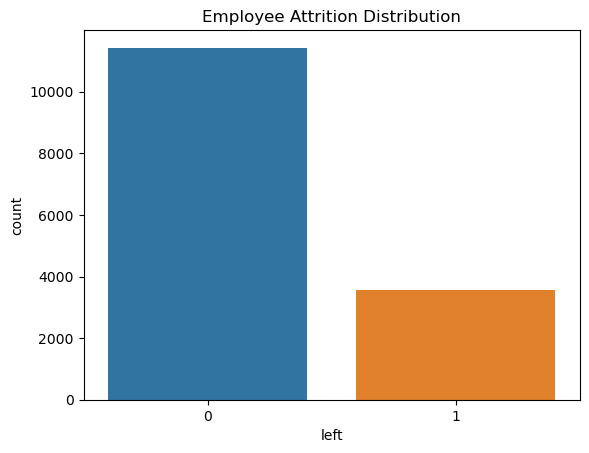

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Attrition count
sns.countplot(x=df["left"])
plt.title("Employee Attrition Distribution")
plt.savefig("salifort_visuals/image1", dpi=300)

plt.show()


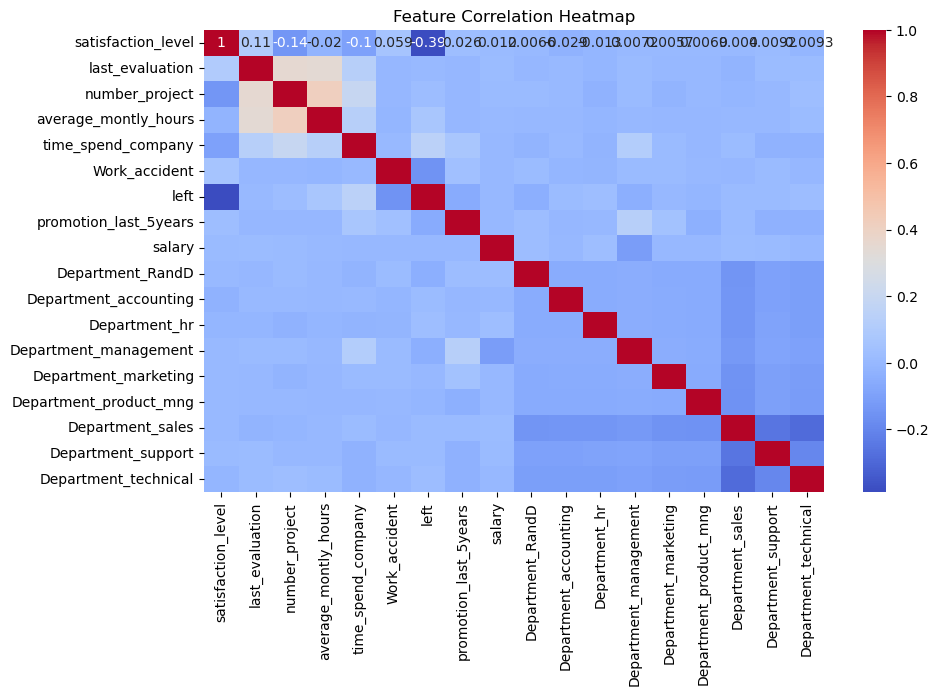

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.savefig("salifort_visuals/image2", dpi=300)


plt.show()


In [11]:
df['tenure_category'] = pd.cut(df['time_spend_company'], bins=[0,2,5,10], labels=['Junior', 'Mid', 'Senior'])


In [12]:
df['workload_ratio'] = df['average_montly_hours'] / df['number_project']


In [13]:
df['performance_change'] = df['last_evaluation'] - df['satisfaction_level']


In [14]:
from sklearn.preprocessing import LabelEncoder

# Encode tenure_category
label_encoder = LabelEncoder()
df['tenure_category'] = label_encoder.fit_transform(df['tenure_category'])

print("Encoded tenure categories:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))


Encoded tenure categories: {'Junior': 0, 'Mid': 1, nan: 2}


In [15]:
df = pd.get_dummies(df, columns=['tenure_category'], drop_first=True)


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Define features and target variable
X = df.drop(columns=['left'])  # Features
y = df['left']  # Target variable

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Feature importance
feature_importance = pd.Series(model.feature_importances_, index=X_train.columns)
print(feature_importance.sort_values(ascending=False))


satisfaction_level        0.226434
number_project            0.149214
workload_ratio            0.123444
time_spend_company        0.114704
performance_change        0.111585
last_evaluation           0.097079
average_montly_hours      0.092841
tenure_category_2         0.046075
tenure_category_1         0.009289
salary                    0.008162
Work_accident             0.006698
Department_technical      0.003037
Department_sales          0.002369
Department_support        0.002021
Department_hr             0.001396
Department_accounting     0.001129
Department_RandD          0.001061
promotion_last_5years     0.000976
Department_management     0.000924
Department_marketing      0.000843
Department_product_mng    0.000721
dtype: float64


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))


Logistic Regression Accuracy: 0.7866666666666666


C:\Users\gowth\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Accuracy: 0.989


In [19]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))


XGBoost Accuracy: 0.987


In [20]:
from sklearn.metrics import classification_report

print("Logistic Regression Performance:\n", classification_report(y_test, y_pred_logreg))
print("Random Forest Performance:\n", classification_report(y_test, y_pred_rf))
print("XGBoost Performance:\n", classification_report(y_test, y_pred_xgb))


Logistic Regression Performance:
               precision    recall  f1-score   support

           0       0.83      0.90      0.87      2294
           1       0.57      0.41      0.47       706

    accuracy                           0.79      3000
   macro avg       0.70      0.65      0.67      3000
weighted avg       0.77      0.79      0.77      3000

Random Forest Performance:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      2294
           1       0.99      0.96      0.98       706

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000

XGBoost Performance:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2294
           1       0.98      0.97      0.97       706

    accuracy                           0.99      3000
   macro avg       0.98      0.98      0.98 

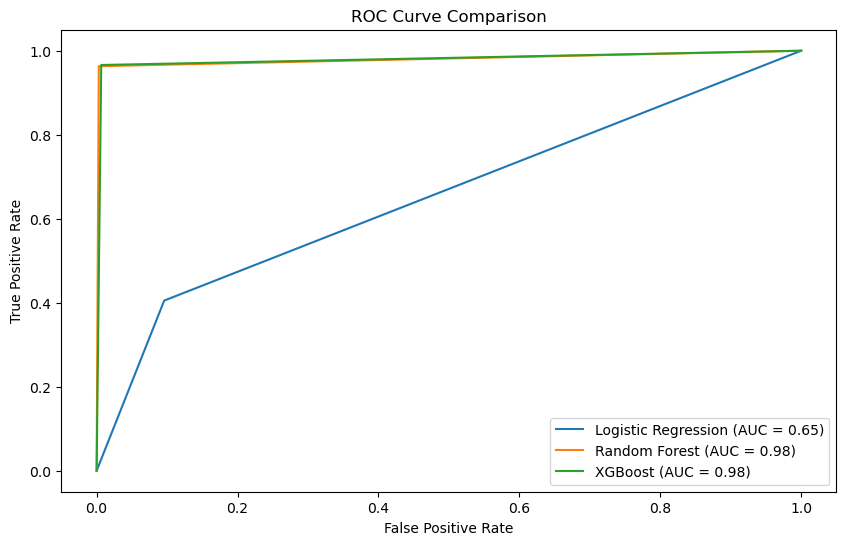

In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

models = {"Logistic Regression": y_pred_logreg, "Random Forest": y_pred_rf, "XGBoost": y_pred_xgb}

plt.figure(figsize=(10,6))
for model_name, y_pred in models.items():
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {auc(fpr, tpr):.2f})")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.savefig("salifort_visuals/image3", dpi=300)

plt.show()


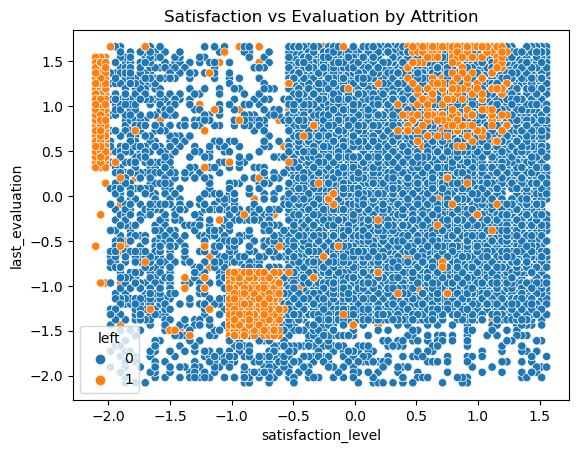

In [22]:
sns.scatterplot(x='satisfaction_level', y='last_evaluation', hue='left', data=df)
plt.title("Satisfaction vs Evaluation by Attrition")
plt.savefig("salifort_visuals/image4", dpi=300)

plt.show()


In [ ]:
sns.pairplot(df[['satisfaction_level', 'last_evaluation', 'average_montly_hours', 'time_spend_company', 'left']], hue='left')
plt.suptitle("Pairwise Relationships", y=1.02)
plt.savefig("salifort_visuals/image5", dpi=300)

plt.show()


C:\Users\gowth\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gowth\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gowth\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gowth\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

In [ ]:
pd.crosstab(df['Department_sales'], df['salary']).plot(kind='bar', stacked=True)
plt.title("Attrition Distribution Across Departments and Salary")
plt.savefig("salifort_visuals/image6", dpi=300)

plt.show()


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Binary classification
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(X_train_scaled, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_split=0.2,
                    callbacks=[early_stop])


In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {accuracy:.4f}")


In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title("Model Accuracy")
plt.savefig("salifort_visuals/image7", dpi=300)

plt.show()


In [ ]:
pip install keras-tuner


In [ ]:
import keras_tuner as kt
from tensorflow import keras

def build_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.Dense(
        hp.Int('units_1', min_value=64, max_value=256, step=32),
        activation='relu', input_shape=(X_train_scaled.shape[1],)))
    model.add(keras.layers.Dropout(hp.Float('dropout_1', 0.2, 0.5, step=0.1)))

    model.add(keras.layers.Dense(
        hp.Int('units_2', min_value=32, max_value=128, step=32),
        activation='relu'))
    model.add(keras.layers.Dropout(hp.Float('dropout_2', 0.2, 0.5, step=0.1)))

    model.add(keras.layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [ ]:
import keras_tuner as kt

tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,  # You can increase this for more thorough search
    executions_per_trial=1,
    directory='tuner_logs',
    project_name='attrition_nn_tuning'
)


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

tuner.search(X_train_scaled, y_train, 
             epochs=20, 
             validation_split=0.2, 
             callbacks=[early_stop],
             verbose=1)




In [ ]:
best_hps = tuner.get_best_hyperparameters(1)[0]

print(f"Optimal units_1: {best_hps.get('units_1')}")
print(f"Optimal dropout_1: {best_hps.get('dropout_1')}")
print(f"Optimal units_2: {best_hps.get('units_2')}")
print(f"Optimal dropout_2: {best_hps.get('dropout_2')}")

# Build the best model and train it
best_model = tuner.hypermodel.build(best_hps)
best_model.fit(X_train_scaled, y_train, 
               epochs=20, 
               validation_split=0.2)
